# Movie Data Analysis Project

Please fill out:
* Student name:Esther Nyawera
* Student pace:Full time
* Scheduled project review date/time: 15th August,2023
* Instructor name: Nikita Njoroge,Samuel Karu, Lucille Kaleha & Diana Mongina
* Blog post URL:


## BUSINESS PROBLEM
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### The Data
In the folder zippedData are movie datasets from:

- Box Office Mojo
- IMDB
- Rotten Tomatoes
- TheMovieDB
- The Numbers 

In this project I will mainly use data from `Box office Mojo`, `IMDB` and `The Numbers`.



The questions we will be trying to answer using `EDA` with `pandas` so as to provide well informed insights are:-

1. The movie budget when creating a movie and the overall performance of high budget or low budget movies when it comes to income generated
2. The different genres of movies and which specific genres perform better.
3. The audience engagement in respect to reviews and rating
4. The prefered runtime  for performing movies.



![MICROSOFT](./Images/microsoft_logo.jpeg)

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import seaborn as sns
import numpy as np

In [262]:
#Loading the csv File

bom_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz') 
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [263]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


It appears there are several columns with null values. Lets remove all rows with null values. We need data in all the columns except `studio`, so lets get rid of all rows with null columns but ignore `studio`

In [264]:
columns_we_need = ['foreign_gross', 'title', 'domestic_gross', 'year']
bom_df = bom_df.dropna(subset=columns_we_need)
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2009 non-null   object 
 4   year            2009 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.2+ KB


### Lets bring in the IMDB movie data.

Now let's create pandas Dataframes for the two datasets, `movie_basics` and `movie_ratings`

In [265]:
df_movie_basics = pd.read_csv('./data/movie_basics.csv')
df_movies_ratings = pd.read_csv('./data/movie_ratings.csv')

Now lets analyse starting with the `movie_basics`.

In [266]:
df_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [267]:
df_movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


JOIN `movie_basics` & `movies_ratings` using the primary key `movie_id`

In [268]:
imdb_df = df_movie_basics.merge(df_movies_ratings, on='movie_id')
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [269]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


Remove all rows that have null columns 

In [270]:

imdb_df = imdb_df.dropna()
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


Now that we have removed all rows that have null values in the columns we need, we can JOIN the `bom_df` and `imdb_df`

In [271]:
combined_df = imdb_df.merge(bom_df, left_on=['primary_title', 'start_year'], right_on=['title', 'year'])
combined_df.to_csv('./data/combined_df.csv')
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 1254
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1255 non-null   object 
 1   primary_title    1255 non-null   object 
 2   original_title   1255 non-null   object 
 3   start_year       1255 non-null   int64  
 4   runtime_minutes  1255 non-null   float64
 5   genres           1255 non-null   object 
 6   averagerating    1255 non-null   float64
 7   numvotes         1255 non-null   int64  
 8   title            1255 non-null   object 
 9   studio           1255 non-null   object 
 10  domestic_gross   1255 non-null   float64
 11  foreign_gross    1255 non-null   object 
 12  year             1255 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 137.3+ KB


Adding another data set that shows the budget for the movies - `tn.movie_budgets.csv.gz`

In [272]:
budgets_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
budgets_df.to_csv('./data/budgets_df.csv')
budgets_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Further Data Cleaning to remove the duplicate columns and convert the data type of columns with currency from  object to float

In [273]:
#dropping some columns that we do not need
columns_to_drop = ['primary_title', 'original_title']

combined_df = combined_df.drop(columns_to_drop, axis=1)

In [274]:
# create a function that removes the '$' sign  and ','infront of the amounts

def strip_non_numerics(value):
    return value.replace(',', '').replace('$', '')

In [275]:
# convert the column types to float.

def columns_to_float(df, column_names):
    copied_df = df.copy()
    for name in column_names:
        copied_df[name] = copied_df[name].astype('float64')
    return copied_df

In [276]:
# converts the columns into numeric data
def make_columns_numeric(df, column_names):
    copied_df = df.copy()
    for name in column_names:
        copied_df[name] = copied_df[name].apply(strip_non_numerics)
        
    return copied_df

In [277]:
columns_to_strip = ['production_budget', 'worldwide_gross', 'domestic_gross']
budgets_df = make_columns_numeric(budgets_df, columns_to_strip)

columns_to_make_floats = ['production_budget', 'worldwide_gross','domestic_gross']
budgets_df = columns_to_float(budgets_df, columns_to_make_floats)

In [278]:
combined_df = make_columns_numeric(combined_df, ['foreign_gross'])
combined_df = columns_to_float(combined_df, ['foreign_gross'])

In [279]:
combined_df['total_gross'] = combined_df['foreign_gross'] + combined_df['domestic_gross']

In [280]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 1254
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1255 non-null   object 
 1   start_year       1255 non-null   int64  
 2   runtime_minutes  1255 non-null   float64
 3   genres           1255 non-null   object 
 4   averagerating    1255 non-null   float64
 5   numvotes         1255 non-null   int64  
 6   title            1255 non-null   object 
 7   studio           1255 non-null   object 
 8   domestic_gross   1255 non-null   float64
 9   foreign_gross    1255 non-null   float64
 10  year             1255 non-null   int64  
 11  total_gross      1255 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 127.5+ KB


## 1. The movie budget when creating a movie and the overall performance of high budget or low budget movies when it comes to income generated

In [281]:
#new df that is normalized 
performance_df = budgets_df[['production_budget', 'worldwide_gross']]
performance_df = (performance_df-performance_df.mean())/performance_df.std()

In [282]:
budgets_df['production_budget'].corr(budgets_df['worldwide_gross'])

0.7483059765694748

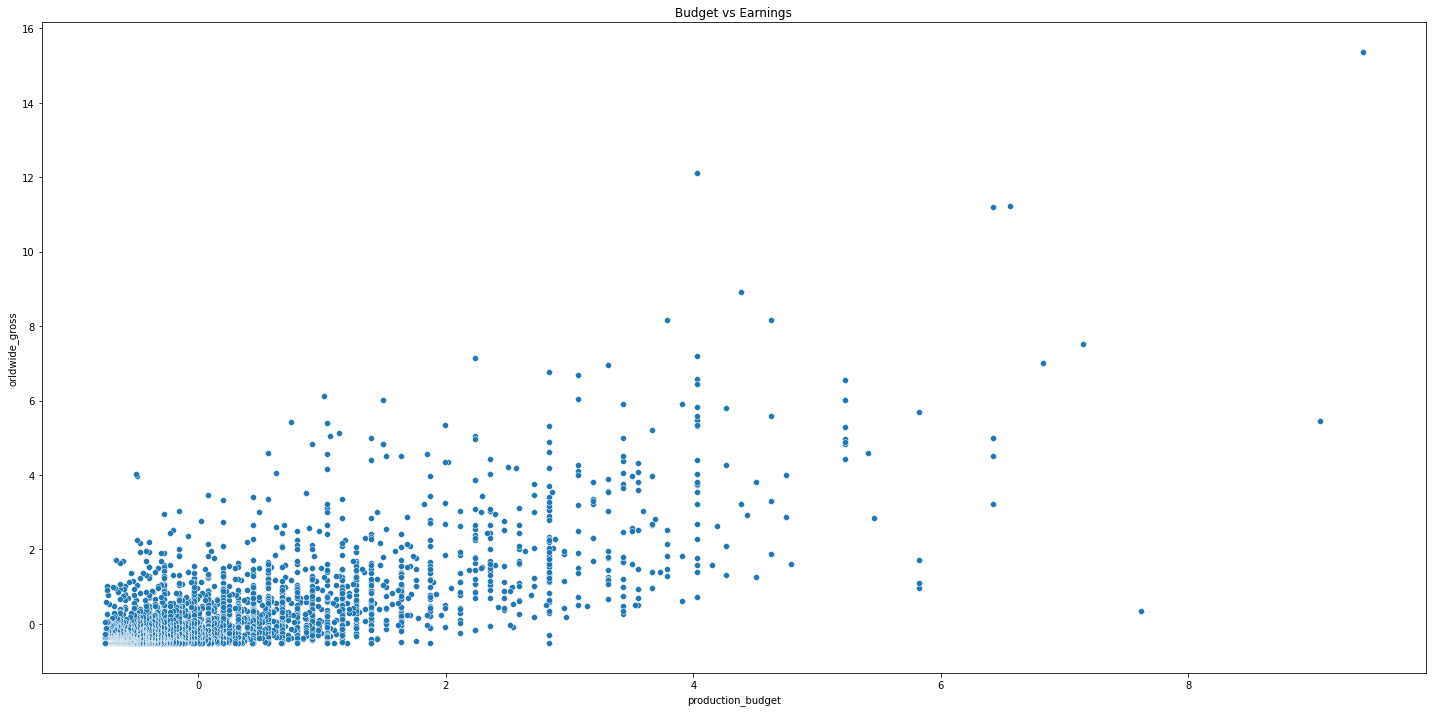

In [283]:
#plotting production_budget against worldwide_gross
X = performance_df['production_budget']
Y = performance_df['worldwide_gross']

fig = plt.subplots(figsize=(20, 10))
scatter = sns.scatterplot(x=X, y=Y)
scatter.set(title='Budget vs Earnings', ylabel='orldwide_gross', xlabel='production_budget')
plt.tight_layout()
plt.show()

### Interpretation
The scatter plot above shows a weak positive correlation.
Even though some high budget movies perform better and have high world wide gross it is not reflected in all scenarios since there are some outliers of low budget movie or medium budget movies performing with very high worldwide gross.
This information shows budget alone cannot provide adequate insight.


## 2. The different genres of movies and which specific genres perform better.

Here we are going to analyze `genres` to see how they appear in general in the given dataframe.
  * some movies are classified into more than one genre,in such instances we have to separate them to individual genres.
  * Then plot all the genres to see how often they occur and also have another visualization analysing the `genres` against `total_gross`to see which genres performs well.

In [284]:
#getting the different genres from the genre column in rows whose movie has multiple genres.
combined_df['genres'] = combined_df['genres'].str.split(',')
exploded_df = combined_df.explode('genres')

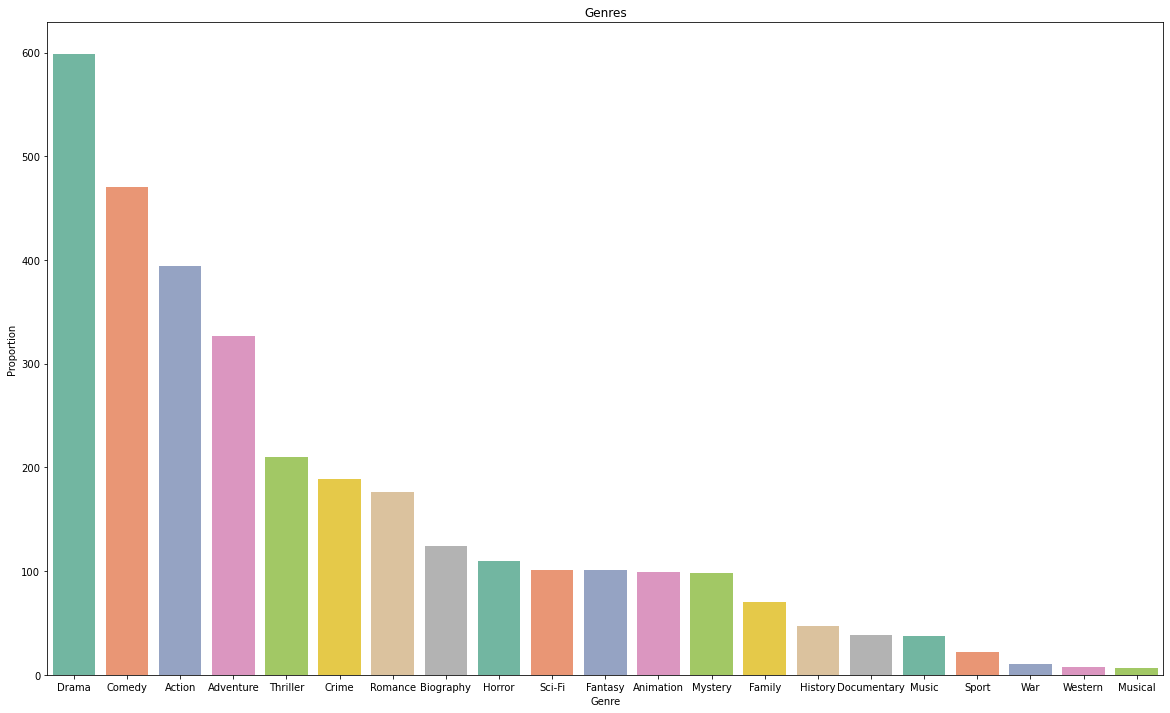

In [285]:
#plotting the result of genres against the number produced
Y = exploded_df['genres'].value_counts()
X = Y.index

fig = plt.subplots(figsize=(20, 12))
bar = sns.barplot(x=X, y=Y, palette="Set2")
bar.set(title='Genres', ylabel='Proportion', xlabel='Genre')
plt.show()

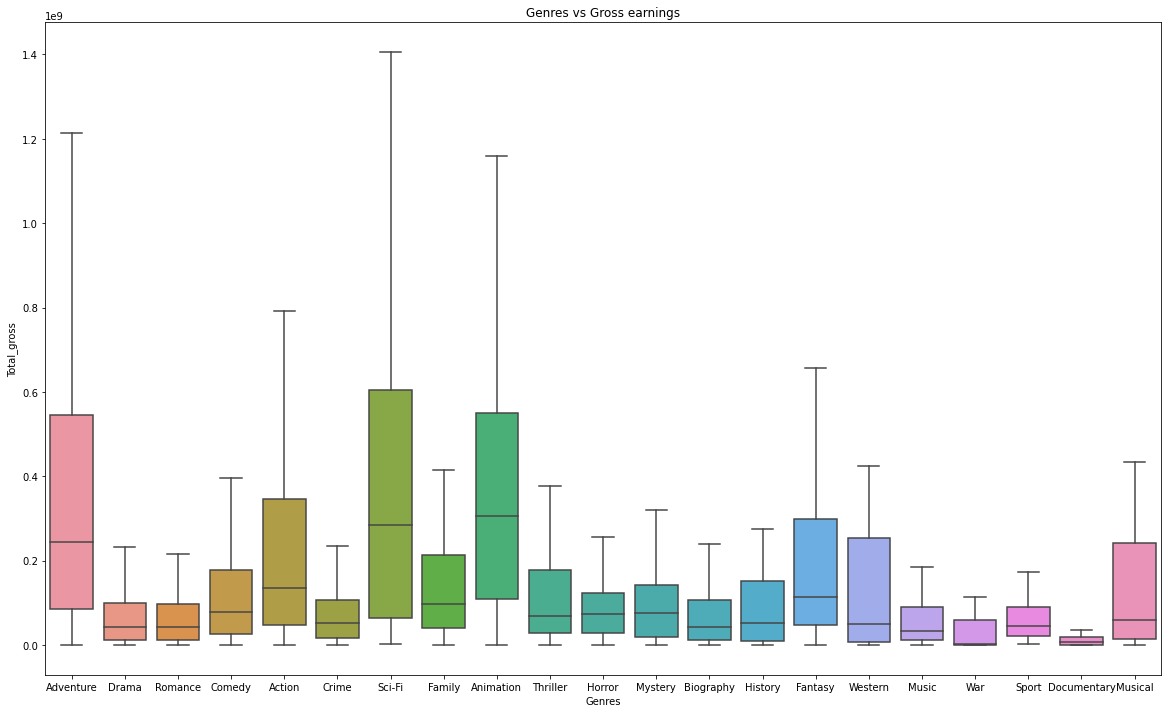

In [292]:
#visualizing the different genres against the total_gross
data = exploded_df[['genres', 'total_gross']]

fig = plt.subplots(figsize=(20, 12))
ax = sns.boxplot(data=exploded_df, x='genres', y='total_gross', showfliers=False)
ax.set(title='Genres vs Gross earnings', ylabel='Total_gross', xlabel='Genres')

plt.show()

### Interpretation

In the `Genres` graph  the genres with the  most produced movies are drama,comedy and action but when it comes to `Genre vs Gross_earnings`  the movies with the highest earning are in `Sci-fi`,`Animation` & `Adventure` 


## 3. The audience engagement in respect to reviews and ratings.

In [287]:
combined_df.info() , combined_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 1254
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1255 non-null   object 
 1   start_year       1255 non-null   int64  
 2   runtime_minutes  1255 non-null   float64
 3   genres           1255 non-null   object 
 4   averagerating    1255 non-null   float64
 5   numvotes         1255 non-null   int64  
 6   title            1255 non-null   object 
 7   studio           1255 non-null   object 
 8   domestic_gross   1255 non-null   float64
 9   foreign_gross    1255 non-null   float64
 10  year             1255 non-null   int64  
 11  total_gross      1255 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 127.5+ KB


(None, (1255, 12))

 Inspect ratings from the `averagerating` column together with the reviews from `numvotes` column to get a better understanding of how the audience interact with different movies.

In [288]:
#creating new df to get the mean of the `averagerating`
#sorting the new df in descending order of numvotes

ratings_df = exploded_df[['averagerating', 'numvotes', 'genres']]

ratings_mean_df = ratings_df.groupby('genres').mean().reset_index().sort_values(by='numvotes', ascending=False)
ratings_mean_df.head()

,genres,averagerating,numvotes
16,Sci-Fi,6.621782,315160.881188
20,Western,6.725000,238403.125000
1,Adventure,6.497248,202151.311927
0,Action,6.436802,187311.944162
9,Fantasy,6.259406,160762.653465


[Text(0.5, 1.0, 'Genres vs Average Rating'),
 Text(0, 0.5, 'Average Rating'),
 Text(0.5, 0, 'Genres')]

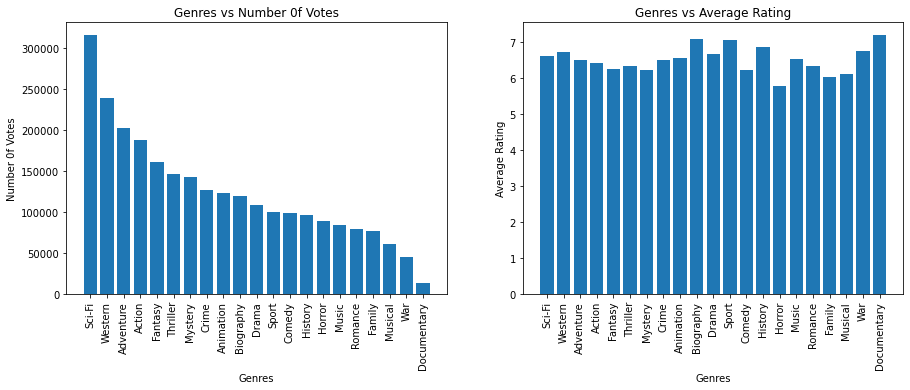

In [289]:
#plotting the bargraphs side by side 

fig, (ax1, ax2) = plt.subplots(figsize=(15, 5), ncols=2)

X = ratings_mean_df['genres']
Y1 = ratings_mean_df['numvotes']
Y2 = ratings_mean_df['averagerating']

ax1.bar(X, Y1)
ax2.bar(X, Y2)

ax1.tick_params(axis='x', labelrotation=90)
ax2.tick_params(axis='x', labelrotation=90)

ax1.set(title='Genres vs Number 0f Votes', ylabel='Number 0f Votes', xlabel='Genres')
ax2.set(title='Genres vs Average Rating', ylabel='Average Rating', xlabel='Genres')


### Interpretation
Sci-fi movies have more reviews and a relatively high average rating.

## 4. The prefered runtime  for performing movies.



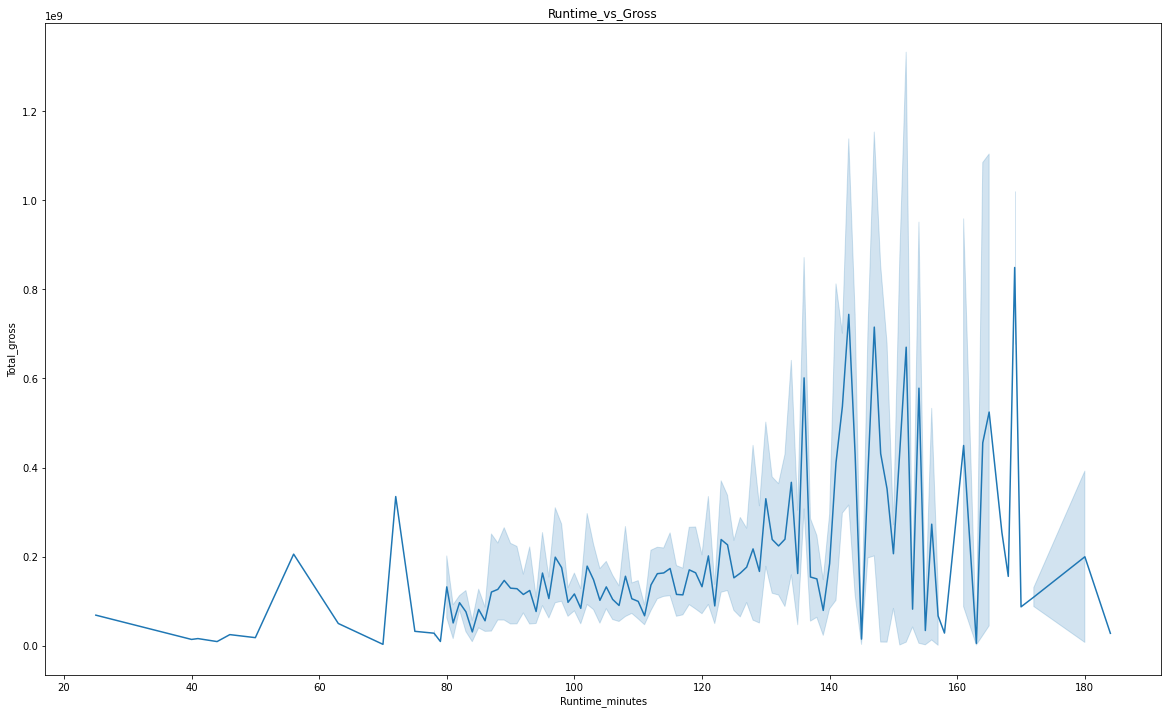

In [290]:
#plotting runtime against total gross income.

fig = plt.subplots(figsize=(20, 12))

Runtime_vs_Gross=sns.lineplot(data=combined_df, x='runtime_minutes', y='total_gross')
Runtime_vs_Gross.set(title='Runtime_vs_Gross', ylabel='Total_gross', xlabel='Runtime_minutes')
plt.show()




### Interpretation
With respect to total earnings, movies with a runtime of between 140:170 minutes are preferred.


In [291]:
budgets_df.sort_values('worldwide_gross', ascending=False).head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09


# Conclusion

The movie business is a vast economy and one cannot fully analyze every aspect of it. In this notebook we have only sampled a fraction of the data provided and as such the findings may not give enough insight but however they do provide at the very least a starting point.

## Recommendations

The data analysis done here leans mostly on the type of films to venture into.
The genre that seems to be earning well is `sci-fi` even though it is not among the most produced genres.
Therefore:-
1. Microsoft could make movies in the sci-fi genre.
2. The movies should have an average runtime of 140 to 170 minutes.
3. Budget is not a clear indicator of movie performance so more research has to be done on other aspects so as to ascertain which part to invest in such as proper story writing, experienced directors, actors, and many more.